In [1]:


import lsst.meas.astrom as measAstrom
import lsst.daf.base as dafBase
import lsst.pipe.base as pipeBase
import lsst.daf.persistence as dafPersist



In [2]:

import lsst.afw.table as afwTable
import lsst.afw.table
#import lsst.meas.algorithms. as sourceDetector
schema = afwTable.SourceTable.makeMinimalSchema()
table = afwTable.SourceTable.make(afwTable.SourceTable.makeMinimalSchema())

sCatalog1 = afwTable.SourceCatalog.readFits(" /renoir_data_02/jpreyes/lsst_data/CFHTLS_v11/output/deepDiff/05AL01/D3/2005-06-29/r/diaSrc-800720-14.fits")
sCatalog2 = afwTable.SourceCatalog.readFits(" /renoir_data_02/jpreyes/lsst_data/CFHTLS_v11/output/deepDiff/05AL01/D3/2005-06-29/r/diaSrc-800721-14.fits")
sCatalog3 = afwTable.SourceCatalog.readFits(" /renoir_data_02/jpreyes/lsst_data/CFHTLS_v11/output/deepDiff/05AL01/D3/2005-06-29/r/diaSrc-800718-14.fits")
sCatalog4 = afwTable.SourceCatalog.readFits(" /renoir_data_02/jpreyes/lsst_data/CFHTLS_v11/output/deepDiff/05AL01/D3/2005-06-29/r/diaSrc-800719-14.fits")



In [26]:
print sCatalog.schema

Schema(
    (Field['L'](name="id", doc="unique ID"), Key<L>(offset=0, nElements=1)),
    (Field['Angle'](name="coord_ra", doc="position in ra/dec"), Key<Angle>(offset=8, nElements=1)),
    (Field['Angle'](name="coord_dec", doc="position in ra/dec"), Key<Angle>(offset=16, nElements=1)),
    (Field['L'](name="parent", doc="unique ID of parent source"), Key<L>(offset=24, nElements=1)),
    (Field['Flag'](name="flags_negative", doc="set if source was detected as significantly negative"), Key['Flag'](offset=32, bit=0)),
    (Field['F'](name="classification_dipole", doc="probability of being a dipole"), Key<F>(offset=40, nElements=1)),
    (Field['D'](name="ip_diffim_NaiveDipoleCentroid_x", doc="Naive Dipole Centroid", units="pixels"), Key<D>(offset=48, nElements=1)),
    (Field['D'](name="ip_diffim_NaiveDipoleCentroid_y", doc="Naive Dipole Centroid", units="pixels"), Key<D>(offset=56, nElements=1)),
    (Field['Flag'](name="ip_diffim_NaiveDipoleCentroid_flag", doc="general failure flag, set

In [4]:
import  lsst.meas.algorithms as meas_alg
from lsst.meas.algorithms import SourceMeasurementTask
import lsst.afw.image as afwImage

sdTask = meas_alg.SourceDetectionTask()
sdConfig  = meas_alg.SourceDetectionTask.ConfigClass()

table = afwTable.SourceTable.make(afwTable.SourceTable.makeMinimalSchema())
#table.setMetadata(algMetadata)

exp = afwImage.ExposureF("/renoir_data_02/jpreyes/lsst_data/CFHTLS_v11/output/deepDiff/05AL01/D3/2005-06-29/r/diffexp-800718-14.fits")


results = sdTask.makeSourceCatalog(table=table, exposure=exp, doSmooth=not True)
meas_alg.


ImportError: cannot import name SourceMeasurementTask

In [89]:
print (results.sources.schema)

Schema(
    (Field['L'](name="id", doc="unique ID"), Key<L>(offset=0, nElements=1)),
    (Field['Angle'](name="coord_ra", doc="position in ra/dec"), Key<Angle>(offset=8, nElements=1)),
    (Field['Angle'](name="coord_dec", doc="position in ra/dec"), Key<Angle>(offset=16, nElements=1)),
    (Field['L'](name="parent", doc="unique ID of parent source"), Key<L>(offset=24, nElements=1)),
)



In [34]:
print len(sCatalog1)
print len(sCatalog2)
print len(sCatalog3)
print len(sCatalog4)

nDipole = 0
for source in sCatalog4:
    if (source.get("classification_dipole") == 1.0):
     nDipole+=1
        
print nDipole
    #source.getApFlux()

273
393
331
484
71


In [79]:
for source in sCatalog1:
    print(source.get("base_PeakLikelihoodFlux_flux"))

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


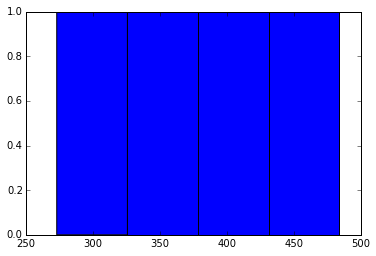

In [41]:

im = afwExposure("/renoir_data_02/jpreyes/lsst_data/CFHTLS_v11/input/raw/05AL01/D3/2005-06-29/r/800717p.fits.fz")
ds9.mtv(im)

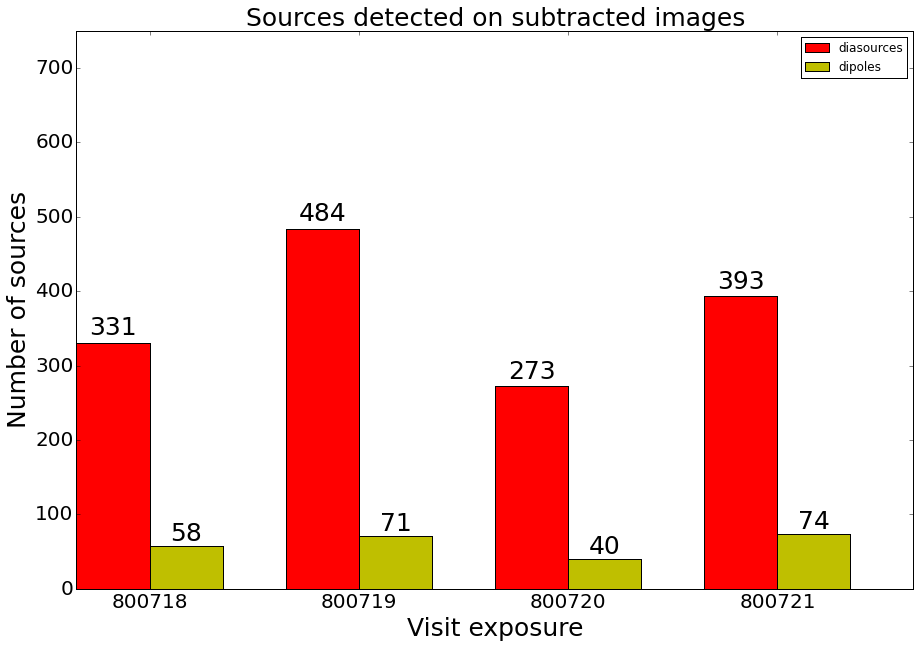

In [76]:
import numpy as np
%matplotlib inline



N = 4
diaSources = (331, 484, 273, 393)
dipoles = (58, 71, 40, 74)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()

fig.set_size_inches(15,10)
fig.set
rects1 = ax.bar(ind, diaSources, width, color='r')


rects2 = ax.bar(ind + width, dipoles, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of sources', fontsize = "25")
ax.set_xlabel('Visit exposure', fontsize = "25")
ax.set_title('Sources detected on subtracted images', fontsize="25")
ax.set_xticks(ind + width)
ax.set_xticklabels(('800718', '800719', '800720', '800721'), fontsize="20")
ax.tick_params(axis='y', labelsize=20)

ax.legend((rects1[0], rects2[0]), ('diasources', 'dipoles'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=25)

ax.set_ylim([0,750])
autolabel(rects1)
autolabel(rects2)

plt.show()

In [3]:


DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_v11"
butler = dafPersist.Butler(DATADIR+"/output")






In [7]:
dataid = {'visit': 800720, 'filter':'r' , 'ccd':14}
butler.get("deepDiff_diaSrc_schema", dataid)

AttributeError: 'ExposureMapping' object has no attribute 'level'

In [ ]:
import lsst.afw.table as afwTable

table = afwTable.SourceTable.make(self.schema, idFactory)
            table.setMetadata(self.algMetadata)
            results = self.detection.makeSourceCatalog(
                table=table,
                exposure=subtractedExposure,
                doSmooth=not self.config.doPreConvolve
                )
